In [1]:
import os
os.chdir("/Users/Dmitry_Rudik/cv_test/cigarette_butt_segmentation")

import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob
import re

from lib import *

%matplotlib inline

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные значения метрик на `val` в формате `pred_val_template.csv`;
- html страницу с предсказанием модели для всех картинок из `real_test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез, анализ данных и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

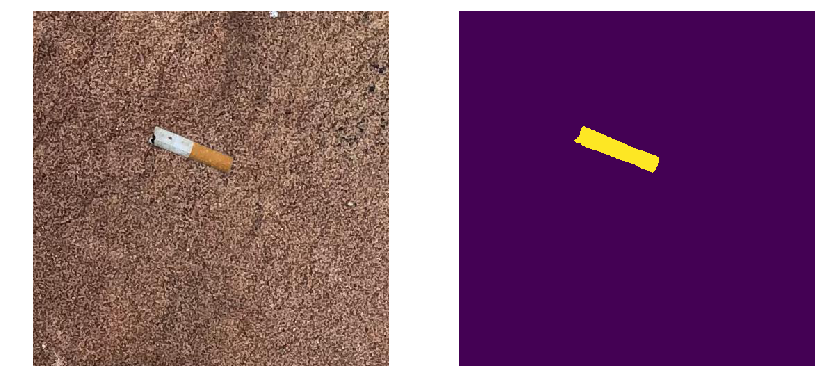

In [10]:
path = "data/train"
images = os.listdir(path+"/images")
annotations = json.load(open(path+"/coco_annotations.json", "r"))
img_id = int(np.random.choice(images).split(".")[0])

img_name = [name for name in glob(path+"/images/*"+str(img_id)+".jpg") if re.search(r'0+'+str(img_id), name)]
img = np.array(Image.open(img_name[0]))
mask = get_mask(img_id, annotations)
show_img_with_mask(img, mask)

Пример подсчета метрики:

In [3]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.012525656544392392

Можно для последовательности масок вычислить среднее значение метрики:

In [4]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.5000236325094309

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [5]:
rle_mask = encode_rle(mask)
rle_mask

'79195 2 79705 5 80215 7 80725 10 81235 13 81746 14 82257 16 82768 18 83279 20 83790 21 84301 23 84812 24 85318 2 85322 27 85829 32 86340 34 86851 35 87363 37 87874 39 88385 40 88895 42 89406 42 89917 43 90427 45 90938 46 91448 49 91959 50 92469 53 92980 54 93491 54 94001 54 94512 53 95024 51 95536 49 96048 47 96560 45 97072 43 97584 38 98097 37 98610 35 99123 33 99636 31 100148 31 100660 30 101172 28 101684 26 102196 23 102709 20 103221 18 103734 14 104247 11 104759 8 105272 5'

Теперь восстановим маску:

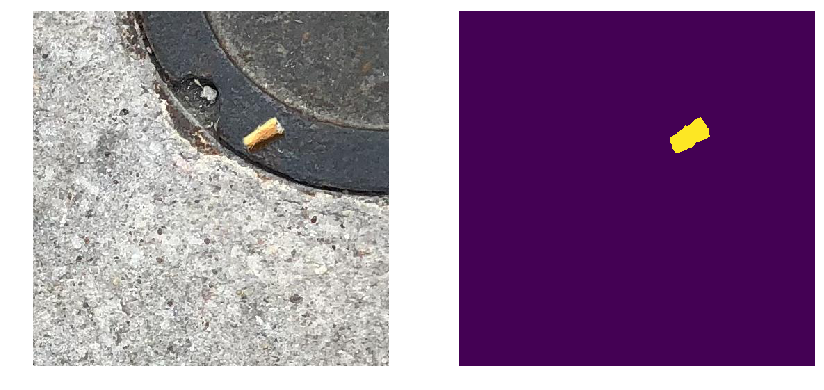

In [6]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [7]:
pred = pd.read_csv("data/pred_val_template.csv")
pred.head()

img_id                                           rle_mask
0       0  171654 1 172158 1 172164 5 172670 3 172674 12 ...
1       1  171654 1 172158 1 172164 5 172670 3 172674 12 ...
2       2  171654 1 172158 1 172164 5 172670 3 172674 12 ...
3       3  171654 1 172158 1 172164 5 172670 3 172674 12 ...
4       4  171654 1 172158 1 172164 5 172670 3 172674 12 ...

Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [8]:
val_annotations = json.load(open("data/val/coco_annotations.json", "r"))
paths_to_imgs = sorted(glob("data/val/images/*"))
img_ids = [int(path.split("/")[-1].split(".")[0]) for path in paths_to_imgs]
pred_masks = [get_mask(img_id, val_annotations) for img_id in sorted(img_ids)]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.